# Libraries 

In [7]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler


# Loading Data Set

In [3]:
loan_df = pd.read_csv('Loan Data.csv')
loan_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


# Splitting Data to feature and Target Sets and Fitting the model

In [35]:
X = loan_df.drop(['default','customer_id'], axis=1) # feature set is df without default and ids
y = loan_df['default'] 

# standardising the features since they are all different units 
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size = 0.2, random_state=42)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

# Checking How Well The Model Works

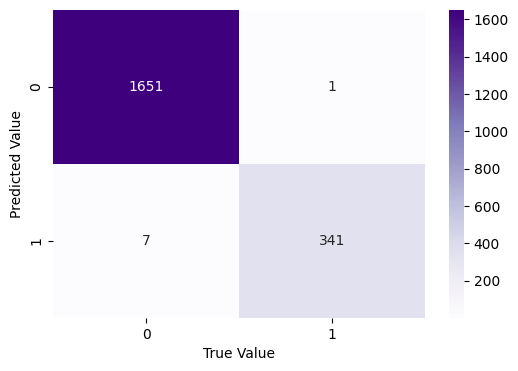

In [42]:
y_pred = log_reg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Purples')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.show()


# Expected Loss Function

In [37]:
def expected_loss(model, scaler, features):

    rec_rate = 0.1 # 10% recovery rate 

    scaled_features = scaler.transform([features])

    pd = model.predict_proba(scaled_features)[:,1][0]

    loss = 1-rec_rate # calculates loss given default 
    exposure = features[1] # how much loan is outstanding 

    expected_loss = pd*exposure*loss

    return expected_loss 


# Expected Loss Parameters

In [41]:
borrower_features = [4, 5221.545193, 1768.826187, 74356.88347, 4, 650]
results = expected_loss(log_reg, scaler, borrower_features)
print(f'The expected loss for this borrower is: $ {np.around(results,decimals=2)}')

The expected loss for this borrower is: $ 96.61
